# Korelacija med anksioznostjo in motivacijo

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_anksioznost_motivacija.xlsx")
df = df.drop('Unnamed: 0', axis=1)

In [115]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
#
#df[['Motivacija', 'Anksioznost']] = scaler.fit_transform(df[['Motivacija', 'Anksioznost']])

In [116]:
#df = df.apply(pd.to_numeric, errors='coerce')

In [117]:
df.head()

,Razred,Profesor,Spol,Motivacija,Anksioznost
0,5,1,0,28,16
1,5,1,1,25,26
2,3,1,0,23,17
3,5,1,1,17,35
4,3,1,1,23,34


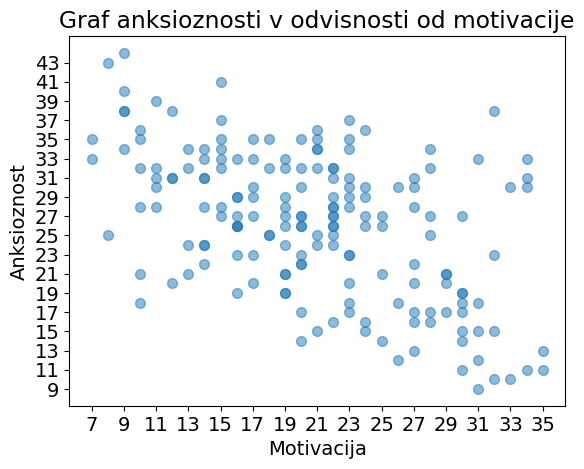

In [118]:
from matplotlib import pyplot
import numpy as np

# Assuming df is your DataFrame containing columns "Motivacija" and "Anksioznost"

min_motivacija = df["Motivacija"].min()
max_motivacija = df["Motivacija"].max()
min_anksioznost = df["Anksioznost"].min()
max_anksioznost = df["Anksioznost"].max()

pyplot.scatter(df["Motivacija"], df["Anksioznost"], alpha=0.5, s=50)  # Adjust 's' (size) as needed

pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')

pyplot.xticks(np.arange(min_motivacija, max_motivacija + 1, 2))
pyplot.yticks(np.arange(min_anksioznost, max_anksioznost + 1, 2))

pyplot.show()

In [119]:
from numpy import cov
covariance = cov(df["Motivacija"], df["Anksioznost"])
print(covariance)

[[ 47.98272984 -26.89493451]
 [-26.89493451  56.45473806]]


In [120]:
from numpy.random import seed
from scipy.stats import pearsonr
seed(42)

In [121]:
from scipy import stats

pearson_corr, pearson_p_value = stats.pearsonr(df["Motivacija"], df["Anksioznost"])
print("Pearson correlation coefficient: %.3f" % pearson_corr)
print("P-value: %.3f" % pearson_p_value)

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = stats.spearmanr(df["Motivacija"], df["Anksioznost"])
print("Spearman correlation coefficient: %.3f" % spearman_corr)
print("P-value: %.3f" % spearman_p_value)

Pearson correlation coefficient: -0.517
P-value: 0.000
Spearman correlation coefficient: -0.470
P-value: 0.000


Test linearnosti

In [122]:
import pandas as pd
import statsmodels.formula.api as smf

# Your code for regression
fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()

# Extracting desired statistics from the summary output
summary_output = fit.summary()

# Extracting model information
model_info = summary_output.tables[0]

# Extracting detailed statistics
detailed_stats = summary_output.tables[1]

# Convert to pandas DataFrames
model_info_df = pd.DataFrame(model_info.data)
detailed_stats_df = pd.DataFrame(detailed_stats.data)

# Save each extracted information to separate CSV files
model_info_df.to_csv('model_info.csv', index=False, header=False)
detailed_stats_df.to_csv('detailed_stats.csv', index=False, header=False)

In [123]:
import statsmodels.formula.api as smf

fit = smf.ols('Motivacija ~ Anksioznost', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Motivacija   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     63.75
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.80e-13
Time:                        15:41:56   Log-Likelihood:                -565.73
No. Observations:                 177   AIC:                             1135.
Df Residuals:                     175   BIC:                             1142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.2734      1.628     20.438      

In [124]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 2.505212311380771),
 ('p-value', 0.11347019186785627),
 ('f-value', 2.512465617448518),
 ('f p-value', 0.11475446127107851)]

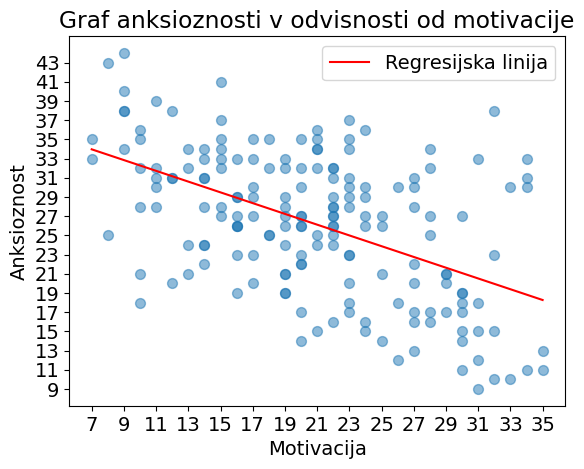

In [125]:
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame containing columns "Motivacija" and "Anksioznost"

# Scatter plot
pyplot.scatter(df["Motivacija"], df["Anksioznost"], alpha=0.5, s=50)  # Adjust 's' (size) as needed
pyplot.xlabel('Motivacija')
pyplot.ylabel('Anksioznost')
pyplot.title('Graf anksioznosti v odvisnosti od motivacije')
# Calculate linear regression (OLS)
X = df[["Motivacija"]]
y = df["Anksioznost"]

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Create regression line
x_values = np.linspace(df["Motivacija"].min(), df["Motivacija"].max(), 100)
y_values = intercept + slope * x_values

# Plot regression line
pyplot.plot(x_values, y_values, color='red', label='Regresijska linija')

# Set ticks
pyplot.xticks(np.arange(df["Motivacija"].min(), df["Motivacija"].max() + 1, 2))
pyplot.yticks(np.arange(df["Anksioznost"].min(), df["Anksioznost"].max() + 1, 2))

# Show plot
pyplot.legend()
pyplot.show()

# Test normalnosti

Shapiro-Wilk Test Results for Motivacija:
P-value: 0.0115
The data in Motivacija does not look Gaussian (reject H0)


Shapiro-Wilk Test Results for Anksioznost:
P-value: 0.0187
The data in Anksioznost does not look Gaussian (reject H0)


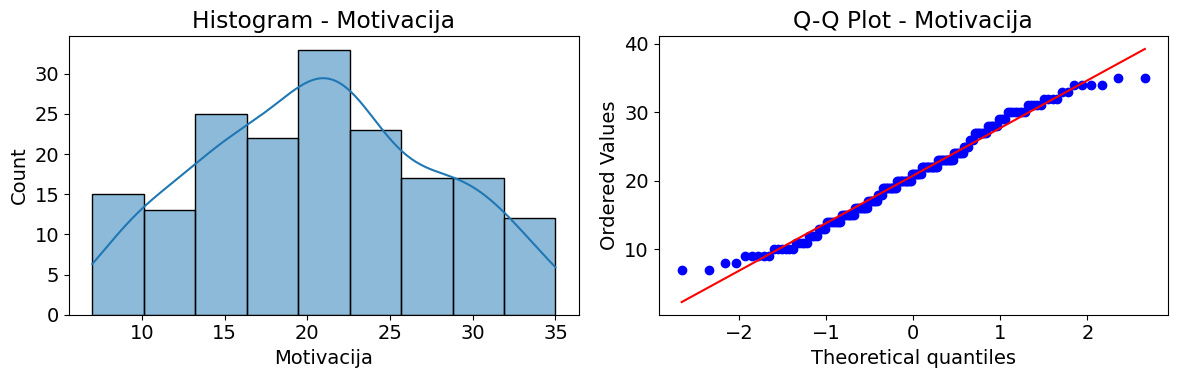

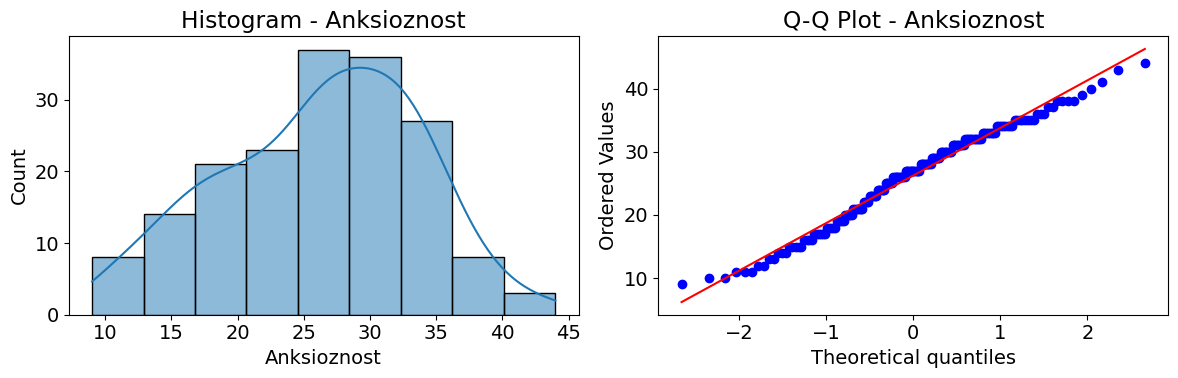

In [126]:
import numpy as np
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your file)
data = df

# Specify the columns to test for normality
column1 = "Motivacija"  # Replace 'column_name_1' with the actual column name
column2 = 'Anksioznost'  # Replace 'column_name_2' with the actual column name

# Perform Shapiro-Wilk test for column 1
statistic1, p_value1 = shapiro(data[column1])

# Perform Shapiro-Wilk test for column 2
statistic2, p_value2 = shapiro(data[column2])

# Display normality assessment
print(f"Shapiro-Wilk Test Results for {column1}:")
print(f"P-value: {p_value1:.4f}")
if p_value1 > 0.05:
    print(f"The data in {column1} looks Gaussian (fail to reject H0)")
else:
    print(f"The data in {column1} does not look Gaussian (reject H0)")

print("\n")

print(f"Shapiro-Wilk Test Results for {column2}:")
print(f"P-value: {p_value2:.4f}")
if p_value2 > 0.05:
    print(f"The data in {column2} looks Gaussian (fail to reject H0)")
else:
    print(f"The data in {column2} does not look Gaussian (reject H0)")

# Visual assessment of normality for column 1
plt.figure(figsize=(12, 4))

# Histogram for column 1
plt.subplot(1, 2, 1)
sns.histplot(data[column1], kde=True)
plt.title(f'Histogram - {column1}')

# Q-Q plot for column 1
plt.subplot(1, 2, 2)
probplot(data[column1], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column1}')

plt.tight_layout()
plt.show()

# Visual assessment of normality for column 2
plt.figure(figsize=(12, 4))

# Histogram for column 2
plt.subplot(1, 2, 1)
sns.histplot(data[column2], kde=True)
plt.title(f'Histogram - {column2}')

# Q-Q plot for column 2
plt.subplot(1, 2, 2)
probplot(data[column2], dist="norm", plot=plt)
plt.title(f'Q-Q Plot - {column2}')

plt.tight_layout()
plt.show()

# SPOL

In [127]:
corr, _ = pearsonr(df["Motivacija"], df["Spol"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.219


### Cohen d, alpha, omega

In [128]:
from numpy import var
from math import sqrt
from numpy import mean
def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = mean(d1), mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [129]:
d = cohend(df["Motivacija"], df["Anksioznost"])
print(d)

-0.7560317575567295


# Anksioznost / spol

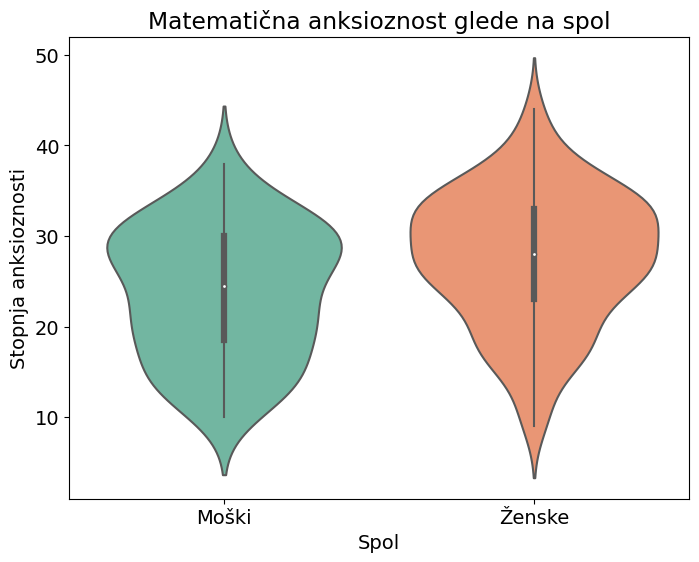

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boxplot
"""plt.figure(figsize=(8, 6))
sns.boxplot(x='Spol', y='Anksioznost', data=df, palette='Set2')
plt.title('Anxiety Levels Across Genders')
plt.xlabel('Gender')
plt.ylabel('Anxiety Level')
plt.xticks([0, 1], ['Male', 'Female'])  # Replace 0 and 1 with your gender labels
plt.show()"""

plt.figure(figsize=(8, 6))
sns.violinplot(x='Spol', y='Anksioznost', data=df, palette='Set2')
plt.title('Matematična anksioznost glede na spol')
plt.xlabel('Spol')
plt.ylabel('Stopnja anksioznosti')
plt.xticks([0, 1], ['Moški', 'Ženske'])  # Replace 0 and 1 with your gender labels
plt.show()

In [134]:
male_anxiety = df[df['Spol'] == 0]['Anksioznost']
female_anxiety = df[df['Spol'] == 1]['Anksioznost']

# Performing t-test
t_stat, p_value = stats.ttest_ind(male_anxiety, female_anxiety)
print(f"T-Statistic: {t_stat:.3f}\nP-Value: {p_value:.3f}")

print("")

f_stat, p_value = stats.f_oneway(male_anxiety, female_anxiety)
print(f"F-Statistic: {f_stat:.3f}\nP-Value: {p_value:.3f}")

T-Statistic: -3.284
P-Value: 0.001

F-Statistic: 10.783
P-Value: 0.001


In [135]:
mean_diff = male_anxiety.mean() - female_anxiety.mean()
pooled_std = ((len(male_anxiety) - 1) * male_anxiety.var() + (len(female_anxiety) - 1) * female_anxiety.var()) / (len(male_anxiety) + len(female_anxiety) - 2)
cohens_d = mean_diff / (pooled_std ** 0.5)
print(f"Cohen's d: {cohens_d:.3f}")

ss_between = ((male_anxiety.mean() - df['Anksioznost'].mean())**2 * len(male_anxiety) + (female_anxiety.mean() - df['Anksioznost'].mean())**2 * len(female_anxiety)) / (len(data) - 1)
ss_total = ((male_anxiety - df['Anksioznost'].mean())**2).sum() + ((female_anxiety - df['Anksioznost'].mean())**2).sum()
eta_squared = ss_between / ss_total
print(f"Eta-squared: {eta_squared:.3f}")

Cohen's d: -0.521
Eta-squared: 0.000


## Vizualizacija

In [136]:
description = data.describe(include='all')
description.to_csv('descrip_anks_motivac.csv', index=True, float_format='%.3f')

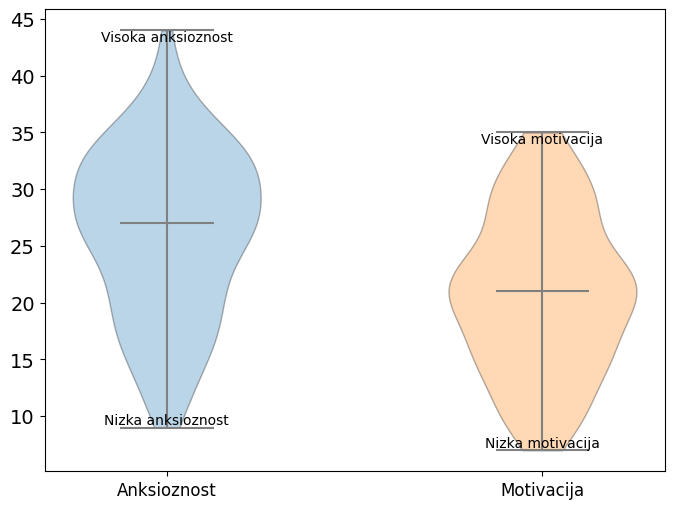

In [137]:
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size

data_to_plot = [data["Anksioznost"], data["Motivacija"]]
positions = [1, 2]

# Create the violin plot
bp = ax.violinplot(data_to_plot, positions=positions, showmedians=True)

# Set colors for the violins and their parts
colors = ['#1f77b4', '#ff7f0e']  # Example colors
for pc, color in zip(bp['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')  # Add black edges to violins

# Customize median line and its style
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
    vp = bp[partname]
    vp.set_edgecolor('grey')  # Adjust color of parts of the violins

# Add labels to x-axis and set font properties
ax.set_xticks(positions)
ax.set_xticklabels(['Anksioznost', 'Motivacija'], fontsize=12)  # Adjust font size

# Define personalized labels for each violin plot
top_labels = ["Nizka anksioznost", "Nizka motivacija"]
bottom_labels = ["Visoka anksioznost", "Visoka motivacija"]

# Add text labels to the top and bottom of each violin plot
for i, data in enumerate(data_to_plot):
    min_value = min(data)
    max_value = max(data)
    ax.text(positions[i], min_value, top_labels[i], ha='center', va='bottom', fontsize=10)  # Adjust font size
    ax.text(positions[i], max_value, bottom_labels[i], ha='center', va='top', fontsize=10)  # Adjust font size

# Add a title
#plt.title('Anksioznost and Motivacija Comparison', fontsize=14)  # Adjust title font size

# Add legend and adjust its appearance
#ax.legend(['Anksioznost', 'Motivacija'], loc='upper right', fontsize=10)  # Adjust legend font size

#plt.grid(axis='y')  # Add grid lines for better readability

plt.show()


In [138]:
df = pd.read_excel("data_anksioznost_motivacija.xlsx")
df = df.drop('Unnamed: 0', axis=1)
df = df.apply(pd.to_numeric, errors='coerce')

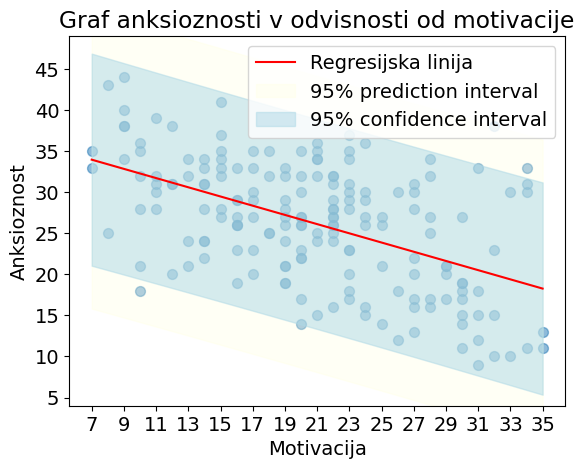

In [139]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame containing columns "Motivacija" and "Anksioznost"

# Scatter plot
plt.scatter(df["Motivacija"], df["Anksioznost"], alpha=0.5, s=50)  # Adjust 's' (size) as needed
plt.xlabel('Motivacija')
plt.ylabel('Anksioznost')
plt.title('Graf anksioznosti v odvisnosti od motivacije')

# Calculate linear regression (OLS)
X = df[["Motivacija"]]
y = df["Anksioznost"]

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Create regression line
x_values = np.linspace(df["Motivacija"].min(), df["Motivacija"].max(), 100)
y_values = intercept + slope * x_values

# Plot regression line
plt.plot(x_values, y_values, color='red', label='Regresijska linija')

# Set ticks and adjust y-axis limits
plt.xticks(np.arange(df["Motivacija"].min(), df["Motivacija"].max() + 1, 2))
plt.ylim([df["Anksioznost"].min() - 5, df["Anksioznost"].max() + 5])  # Adjust the range as needed

# Confidence and prediction intervals
residual = y - model.predict(X)
std_error = np.sqrt(np.sum(residual ** 2) / (X.shape[0] - 2))  # Standard deviation of the error
t = stats.t.ppf(0.975, X.shape[0] - 2)  # Students statistic of interval confidence

# calculating the confidence interval
ci = t * std_error * (1 + 1 / X.shape[0] + (x_values - np.mean(X.values)) ** 2 / np.sum((X.values - np.mean(X.values)) ** 2)) ** 0.5

# calculating the prediction interval
pi = t * std_error * (1 + 1 / X.shape[0] + 1 + (x_values - np.mean(X.values)) ** 2 / np.sum((X.values - np.mean(X.values)) ** 2)) ** 0.5

# Plotting intervals with transparency
plt.fill_between(x_values, y_values + pi, y_values - pi, color='lightyellow', alpha=0.3, label='95% prediction interval')
plt.fill_between(x_values, y_values + ci, y_values - ci, color='lightblue', alpha=0.5, label='95% confidence interval')

plt.legend()
plt.show()
